In [53]:
import csv
import matplotlib.pyplot as plt
import re
import platform
import matplotlib.font_manager as fm

DIR = '../../Data/'
f = open(DIR+'age.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)
print(header)
for row in data: 
    if '산격3' in row[0]:
        print(row)
f.close()

['행정구역', '2022년06월_계_총인구수', '2022년06월_계_연령구간인구수', '2022년06월_계_0세', '2022년06월_계_1세', '2022년06월_계_2세', '2022년06월_계_3세', '2022년06월_계_4세', '2022년06월_계_5세', '2022년06월_계_6세', '2022년06월_계_7세', '2022년06월_계_8세', '2022년06월_계_9세', '2022년06월_계_10세', '2022년06월_계_11세', '2022년06월_계_12세', '2022년06월_계_13세', '2022년06월_계_14세', '2022년06월_계_15세', '2022년06월_계_16세', '2022년06월_계_17세', '2022년06월_계_18세', '2022년06월_계_19세', '2022년06월_계_20세', '2022년06월_계_21세', '2022년06월_계_22세', '2022년06월_계_23세', '2022년06월_계_24세', '2022년06월_계_25세', '2022년06월_계_26세', '2022년06월_계_27세', '2022년06월_계_28세', '2022년06월_계_29세', '2022년06월_계_30세', '2022년06월_계_31세', '2022년06월_계_32세', '2022년06월_계_33세', '2022년06월_계_34세', '2022년06월_계_35세', '2022년06월_계_36세', '2022년06월_계_37세', '2022년06월_계_38세', '2022년06월_계_39세', '2022년06월_계_40세', '2022년06월_계_41세', '2022년06월_계_42세', '2022년06월_계_43세', '2022년06월_계_44세', '2022년06월_계_45세', '2022년06월_계_46세', '2022년06월_계_47세', '2022년06월_계_48세', '2022년06월_계_49세', '2022년06월_계_50세', '2022년06월_계_51세', '2022년06월_계_52세', '2022년

In [30]:
f = open(DIR+'age.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)
result = []
for row in data: 
    if '산격3' in row[0]:
        for data in row[3:]:
            result.append(data)
print(result)
f.close()

['13', '9', '19', '26', '22', '26', '24', '35', '16', '33', '30', '38', '37', '31', '38', '40', '35', '49', '127', '179', '193', '250', '345', '371', '351', '339', '298', '268', '231', '226', '205', '161', '158', '123', '90', '87', '81', '85', '75', '83', '106', '87', '112', '100', '68', '98', '92', '105', '117', '115', '109', '104', '131', '117', '114', '137', '124', '116', '108', '133', '120', '171', '158', '127', '135', '109', '129', '118', '102', '107', '103', '79', '98', '95', '84', '82', '44', '67', '55', '74', '46', '53', '61', '35', '39', '32', '39', '19', '18', '12', '10', '12', '8', '9', '2', '3', '0', '3', '0', '0', '1']


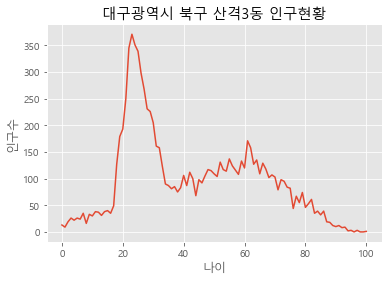

In [31]:
f = open(DIR+'age.csv', encoding='euc_kr')
data = csv.reader(f)
result = []
city = ''
for row in data:
    if '산격3' in row[0]:
        str_list = re.split('[()]', row[0]) # [0]: '대구광역시 북구 산격3동(2723063000)'
        city = str_list[0]
        for data in row[3:]: # 0세부터 100세 이상까지 데이터
            result.append(int(data)) # 숫자로 변환
f.close()

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.title('{0} 인구현황'.format(city))
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot') # R에서 사용하는 ggplot 패키지 형태
plt.plot(result)
plt.show()

In [33]:
city = '대구광역시 북구 산격3동(2723063000)'
str_list = re.split('[()]', city)
print(len(str_list))
print(str_list[0])
for i in range(len(str_list)):
    print('[{}]: {}'.format(i, str_list[i]))
print(str_list)

3
대구광역시 북구 산격3동
[0]: 대구광역시 북구 산격3동
[1]: 2723063000
[2]: 
['대구광역시 북구 산격3동', '2723063000', '']


In [35]:
s = 'apple orange:banana,tomato;melon' 
fruits = re.split('[ ,:;]', s) # 대괄호 안에 분리할 문자 다 넣음
print(fruits)

['apple', 'orange', 'banana', 'tomato', 'melon']


In [42]:
def parse_district_name(district):
    '''
    '행정구역' 명칭에서 숫자 부분을 제거함
    - 서울특별시 종로구 (1111000000)
    '''
    district_name = re.split('[()]', district)
    # [0]: 행정구역 이름, [1]: 코드 번호
    return district_name[0]

def print_population(population):
    '''
    특정 지역의 인구 현황을 화면에 출력함
    '''
    for i in range(len(population)):
        print('{0:3d}세: {1:4d}명'.format(i, population[i]), end=' ')
        if (i + 1) % 10 == 0:
            print()

In [38]:
parse_district_name('서울특별시 종로구 (1111000000)')

'서울특별시 종로구 '

In [48]:
print_population('10세')

ValueError: Unknown format code 'd' for object of type 'str'

In [50]:
def draw_population(district_name, population_list):
    '''
    특정 지역에 대한 인구 분포를 그래프로 나타냄(plot)
    - district_name: 지역 이름
    - population_list: 0~100세 이상까지 인구수 리스트
    '''
    # 그래프 출력
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
        plt.rc('font', family=font_name)
    else:
        plt.rc('font', family='AppleGothic')

    plt.style.use('ggplot')
    plt.title('{} 인구 현황'.format(district_name))
    plt.xlabel('나이')
    plt.ylabel('인구수')
    
    plt.bar(range(101), population_list)
    plt.xticks(range(0, 101, 10)) # 0세 ~ 100세 이상

    plt.plot(population_list)
    plt.show()

인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: 산격3
  0세:   13명   1세:    9명   2세:   19명   3세:   26명   4세:   22명   5세:   26명   6세:   24명   7세:   35명   8세:   16명   9세:   33명 
 10세:   30명  11세:   38명  12세:   37명  13세:   31명  14세:   38명  15세:   40명  16세:   35명  17세:   49명  18세:  127명  19세:  179명 
 20세:  193명  21세:  250명  22세:  345명  23세:  371명  24세:  351명  25세:  339명  26세:  298명  27세:  268명  28세:  231명  29세:  226명 
 30세:  205명  31세:  161명  32세:  158명  33세:  123명  34세:   90명  35세:   87명  36세:   81명  37세:   85명  38세:   75명  39세:   83명 
 40세:  106명  41세:   87명  42세:  112명  43세:  100명  44세:   68명  45세:   98명  46세:   92명  47세:  105명  48세:  117명  49세:  115명 
 50세:  109명  51세:  104명  52세:  131명  53세:  117명  54세:  114명  55세:  137명  56세:  124명  57세:  116명  58세:  108명  59세:  133명 
 60세:  120명  61세:  171명  62세:  158명  63세:  127명  64세:  135명  65세:  109명  66세:  129명  67세:  118명  68세:  102명  69세:  107명 
 70세:  103명  71세:   79명  72세:   98명  73세:   95명  74세:   84명  75세:   82명  76세:   44명  77세:   67명  78세:   55명  79세:

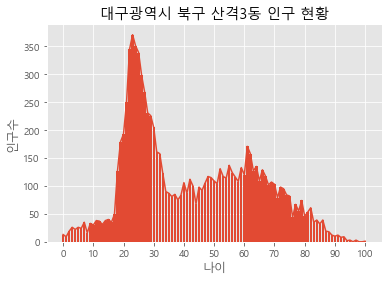

In [54]:
def get_population(district):
    f = open(DIR+'age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data) # 헤더 정보 건너뜀

    population_list = []
    full_district_name = ''
    for row in data:
        if district in row[0]:
            full_district_name = parse_district_name(row[0]) # (시 구 동) 이름만 분리
            for data in row[3:]:
                if ',' in data:
                    data = data.replace(',','') # 천단위 콤마 제거
                population_list.append(int(data))

    f.close()
    print_population(population_list)
    draw_population(full_district_name, population_list)

district = input('인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ')
get_population(district)


In [55]:
def parse_city_name(city):
    '''
    행정구역명에서 도시 이름 파싱 (코드 번호 제거)
    :param city:
    :return:
    '''
    city_name = re.split('[()]', city)
    # [0]: 행정구역 이름, [1]:
    return city_name[0]

In [58]:
def draw_piechart(city_name, city_population, voting_population):
    '''
    전체 인구수 대비 투표 가능 인구의 파이차트 작성
    '''
    non_voting_population = city_population - voting_population
    population = [non_voting_population, voting_population]
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    color = ['tomato', 'royalblue']
    plt.pie(population, labels=['18세 미만', '투표가능인구'], autopct='%.1f%%',
            colors=color, startangle=90)

    plt.legend()
    plt.title(city_name + " 투표 가능 인구 비율")
    plt.show()

투표 가능 인구수를 확인할 도시이름을 입력하시오: 산격3
대구광역시 북구 산격3동 전체 인구수:9,499명, 투표 가능 인구수: 8,978명


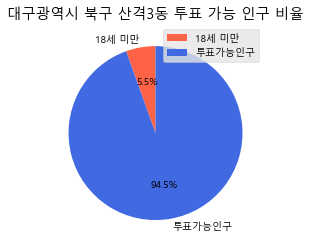

In [63]:
def get_voting_population(city):
    '''
    전체 인구수 : row[1], 투표 가능 인구수 분석 row[21:]
    '''
    f = open(DIR+'age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data) # 헤더 정보 건너뜀
    city_name = ''
    city_population = 0 # 도시 전체 인구수
    voting_population = 0 # 투표 가능 인구수
    for row in data:
        if city in row[0]:
            city_population = row[1]
            if ',' in city_population:
                # 도시 전체 인구수에서 천단위 콤마 제거

                city_population = city_population.replace(',', '')
            city_population = int(city_population)
            city_name = parse_city_name(row[0]) # (시 구 동) 이름만 분리: 지역 번호 제거
            for data in row[21:]:
                if ',' in data:
                    data = data.replace(',','') # 천단위 콤마 제거
                voting_num = int(data)
                voting_population += voting_num # 누적된 투표 가능 인구수
            break
    f.close()
    print('{} 전체 인구수:{:,}명, 투표 가능 인구수: {:,}명'.
        format(city_name, city_population, voting_population))
    draw_piechart(city_name, city_population, voting_population)
city = input('투표 가능 인구수를 확인할 도시이름을 입력하시오: ')
get_voting_population(city)

In [ ]:
f = open(DIR+'age.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data) # 헤더 정보 건너뜀
city_name = ''
city_population = 0 # 도시 전체 인구수
voting_population = 0 # 투표 가능 인구수

for row in data:
    if city in row[0]:
        city_population = row[1]
        if  ',' in city_population:
            city_population = city_population.replace(',','')
        city_population = int(city_population)
        city_name = parse_city_name(row[0])
    for data in row[21:]:
        if ',' in data:
            data = data.replace(',','')
            voting_population += voting_num
    break
f.close()